# 1 Installing packages and dependencies used

In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import mediapipe as mp

# 2. Getting keypoints data from Mediapipe Landmarks from image captured

In [2]:
#2. Getting keypoints data from Mediapipe Landmarks from image captured
#Creating Landmarks for images using Mp Holistic

mp_holistic = mp.solutions.holistic #holistic model

#draw utils used to draw landmarks on object detected (face, pose, right hand, left hand)
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [3]:
#Creating Functions for Landmarks detection
def mediapipe_detection(image, model):
    #cvt color used to converts an input image from one color to another
    #fungsinya buat nandain nanti objek yang di detect make warna yg beda2
    #variabel image dipakai untuk nyimpen data dari landmarks
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion from BGR to RGB
    image.flags.writeable = False                  # Image no longer writeable
    results = model.process(image)                 # Making predictions
    image.flags.writeable = True                   #Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion from RGB to BGR
    return image, results                          #returning the result to the loop

In [4]:
#Creating Functions for Landmarks drawing
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [5]:
#Opening Camera for Image Collection
cap = cv2.VideoCapture(0)
#setting mediapipe model
#min det con is for initial detection, and min tracking it will make initial detection and to track the keypoints
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #reading feed from webcam
        ret, frame = cap.read()

        #making detections
        image, results = mediapipe_detection(frame, holistic)
        
        #draw landmarks
        draw_landmarks(image, results)

        #show to screen (open cv feed nama windownya)
        cv2.imshow('FRAME', image)

        #breaking the loop to stop the window   
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2. destroyAllWindows()

# 3. Extracting keypoints value

In [6]:
results.pose_landmarks.landmark

[x: 0.60537153
y: 0.61281043
z: -0.8541166
visibility: 0.9999395
, x: 0.63108385
y: 0.55288845
z: -0.8019136
visibility: 0.9998655
, x: 0.64633644
y: 0.55350035
z: -0.80148876
visibility: 0.99986464
, x: 0.6603744
y: 0.55408704
z: -0.80051726
visibility: 0.99981666
, x: 0.5837501
y: 0.5447754
z: -0.8152019
visibility: 0.99990004
, x: 0.56431496
y: 0.5399106
z: -0.8143412
visibility: 0.99990827
, x: 0.5449815
y: 0.5347849
z: -0.8143234
visibility: 0.99990284
, x: 0.67161983
y: 0.56862825
z: -0.46736065
visibility: 0.99977237
, x: 0.51065224
y: 0.546508
z: -0.5166999
visibility: 0.9999335
, x: 0.62010825
y: 0.6728334
z: -0.72802365
visibility: 0.9998729
, x: 0.5708566
y: 0.66816694
z: -0.7444924
visibility: 0.9999361
, x: 0.73488
y: 0.8502387
z: -0.24835566
visibility: 0.99845177
, x: 0.35332763
y: 0.8588202
z: -0.24517159
visibility: 0.9986113
, x: 0.8629694
y: 1.2474611
z: -0.67166054
visibility: 0.5943125
, x: 0.24674198
y: 1.272035
z: -0.031103859
visibility: 0.22642268
, x: 0.827557

In [7]:
results.face_landmarks.landmark

[x: 0.5960706
y: 0.6780945
z: -0.020193797
, x: 0.60459393
y: 0.63867885
z: -0.045421872
, x: 0.5999215
y: 0.64839464
z: -0.021639623
, x: 0.5993436
y: 0.5943204
z: -0.038907677
, x: 0.60628515
y: 0.6263111
z: -0.049335066
, x: 0.6071996
y: 0.6089191
z: -0.047347024
, x: 0.60809404
y: 0.5645474
z: -0.02862065
, x: 0.54040843
y: 0.54327375
z: -0.004516775
, x: 0.6102215
y: 0.5324795
z: -0.026445946
, x: 0.6121325
y: 0.5153476
z: -0.030280547
, x: 0.6172261
y: 0.44582784
z: -0.027468033
, x: 0.5951327
y: 0.68466914
z: -0.018534537
, x: 0.59405357
y: 0.6896331
z: -0.015103507
, x: 0.59326553
y: 0.691517
z: -0.010807233
, x: 0.59268177
y: 0.6986406
z: -0.008061147
, x: 0.5921963
y: 0.7053392
z: -0.00884533
, x: 0.591418
y: 0.7132245
z: -0.00948847
, x: 0.5904248
y: 0.7206174
z: -0.006620679
, x: 0.58859783
y: 0.72759867
z: 0.0040715965
, x: 0.60303116
y: 0.64404684
z: -0.040462807
, x: 0.5934046
y: 0.64070964
z: -0.029333748
, x: 0.5061171
y: 0.48017883
z: 0.024672939
, x: 0.56599605
y: 0.

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
#buat extracting keypoints yang ada, hasil data keypoints dari pengambilan gambar sebelumnya bakal dimasukin kedalam variabel
#data yang dimasukin ke variable dalam bentuk array, tapi kalo datanya gaada bakal diisi sama array yang nilainya 0 sebanyak jumlah seharusnya
#seluruh data yang ada akan di flatten biar jadi 1 big array didalam variablenya
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
extract_keypoints(results).shape

(1662,)

In [12]:
result_test = extract_keypoints(results)

In [13]:
#data yang disimpen dari hasil test akan disimpen dalam bentuk numpy diawali dengan nama 0
np.save('0', result_test)

In [ ]:
np.load('0.npy')

# 4. Setuping Folder for Data Collection

In [6]:
#4. Setuping Folder for Data Collection

#path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that being tried to detect
actions = np.array(['Saya','Anda','Terima Kasih','Maaf','Cinta'])

#thirty videos worth of data
no_sequences = 30

#videos going to be 10 frames in length in every video
sequence_length = 20

In [7]:
for action in actions: #bakal ngeloop pas proses pembuatan variabel action
    for sequence in range(no_sequences): #bakal ngeloop sebanyak jumlah sequences
        try: 
            #bakal bikin folder pas loopnya jalan sesuai nama stringnya
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            #kalo foldernya udah ada, bakal di skip prosesnya
            pass

# 5. Collecting landmarks Dataset for Training and Testing

In [ ]:
#5. Collecting landmarks Dataset for Training and Testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'MULAI PENGAMBILAN GAMBAR', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Pengambilan gambar untuk {} Urutan Ke-{} '.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Data Collecting', image)
                    cv2.waitKey(4000)
                else: 
                    cv2.putText(image, 'Pengambilan gambar untuk {} Urutan Ke-{} '.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Data Collecting', image)
                
                # NEW Export keypoints
                # data keypoints yang didapet bakal di extract kedalam folder dari setiap action yang ada
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Data Preprocessing

In [8]:
#importing model selection for splitting data into train and test
from sklearn.model_selection import train_test_split
#dipakai to_categorical buat convert data yang ada ke bentuk binary buat ngelakuin one hot encoding
from tensorflow.keras.utils import to_categorical

In [9]:
#buat label map untuk defining setiap action dari array yang ada
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'Saya': 0, 'Anda': 1, 'Terima Kasih': 2, 'Maaf': 3, 'Cinta': 4}

In [11]:
sequences, labels = [], [] #sequences represents x data (features) and labels is y data (labels)
for action in actions:
    for sequence in range(no_sequences): #gonna loop thru 30 videos, videos became sequences
        window = [] #represent all the different frames for particular sequences
        
        #loading up every frames in a sequence from 0 to 29 then going to the next sequence
        for frame_num in range(sequence_length): #dalam setiap frame sesuai nomornya
            #using numpy to load array frame yang tadi ada sebelumnya, sampingnya adalah path data sequencenya
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
#converting data for one hot encoding
y = to_categorical(labels).astype(int)

In [13]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [14]:
np.array(sequences).shape

(150, 20, 1662)

In [15]:
np.array(labels).shape

(150,)

In [16]:
#data dari sequences sebelumnya disimpen di numpy array
X = np.array(sequences)

In [17]:
#jumlah keseluruhan data
#ada 150 sequence yang berisi 20 frame dimana dengan total data 1662 pada setiap frame
X.shape

(150, 20, 1662)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [44]:
X_val.shape

(39, 20, 1662)

In [45]:
y_val.shape

(39, 5)

In [46]:
X_test.shape

(8, 20, 1662)

In [47]:
y_test.shape

(8, 5)

In [48]:
X_train.shape

(88, 20, 1662)

In [49]:
y_train.shape

(88, 5)

# 7. Building and Training LSTM Neural Network Model

In [20]:
import tensorflow as tf

In [21]:
#sequential to build sequential neural network
from tensorflow.keras.models import Sequential
#going to be LSTM layer to build neural network, Dense for fully connected layer
from tensorflow.keras.layers import LSTM, Dense
#logging into tensorboard for tracing model training
from tensorflow.keras.callbacks import TensorBoard

In [35]:
X_train.shape

(127, 20, 1662)

In [22]:
#tensorboard callback (web udates to trace neural network training)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [50]:
# Define the CNN model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 1662, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(actions.shape[0], activation='softmax'))

In [51]:
#categorical entropy is used because binaries classification model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [69]:
#bisa ditambahin add ons dari keras buat stop training once the data is fit
history = model.fit(X_train, y_train, epochs=30, batch_size = 32, callbacks=[tb_callback], validation_data=(X_val, y_val))

Epoch 1/30
3/3 [==============================] - 1s 322ms/step - loss: 0.1766 - categorical_accuracy: 0.8977 - val_loss: 0.3482 - val_categorical_accuracy: 0.7692
Epoch 2/30
3/3 [==============================] - 1s 302ms/step - loss: 0.1502 - categorical_accuracy: 0.9432 - val_loss: 0.3624 - val_categorical_accuracy: 0.8718
Epoch 3/30
3/3 [==============================] - 1s 318ms/step - loss: 0.2151 - categorical_accuracy: 0.9091 - val_loss: 0.3548 - val_categorical_accuracy: 0.8205
Epoch 4/30
3/3 [==============================] - 1s 305ms/step - loss: 0.2357 - categorical_accuracy: 0.8750 - val_loss: 0.4267 - val_categorical_accuracy: 0.7692
Epoch 5/30
3/3 [==============================] - 1s 312ms/step - loss: 0.1346 - categorical_accuracy: 0.9545 - val_loss: 0.4158 - val_categorical_accuracy: 0.8974
Epoch 6/30
3/3 [==============================] - 1s 315ms/step - loss: 0.2460 - categorical_accuracy: 0.8864 - val_loss: 0.2875 - val_categorical_accuracy: 0.8718
Epoch 7/30
3/3 [

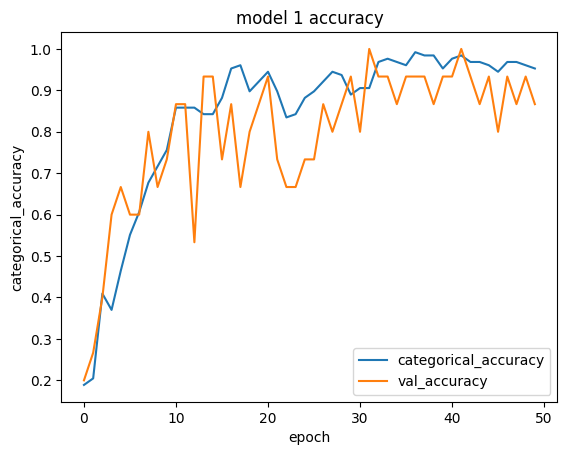

In [40]:
#accuracy chart
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['categorical_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

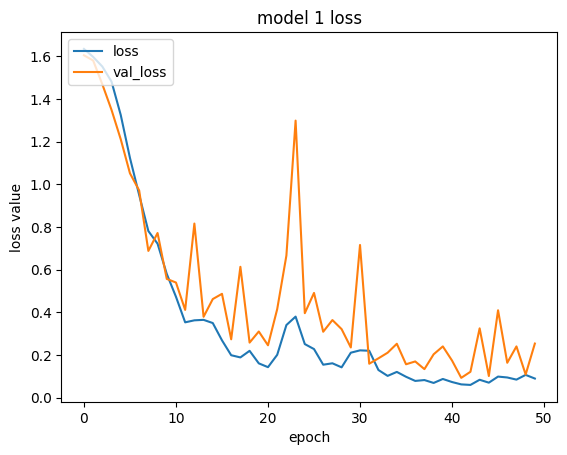

In [41]:
#loss chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
del model

In [25]:
# Define the CNN model architecture
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 1662, 1)))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(actions.shape[0], activation='softmax'))

In [50]:
#categorical entropy is used because binaries classification model
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
#bisa ditambahin add ons dari keras buat stop training once the data is fit
hist2 = model2.fit(X_train, y_train, epochs=50, batch_size = 16, callbacks=[tb_callback], validation_data=(X_val, y_val))

Epoch 1/50
8/8 [==============================] - 3s 203ms/step - loss: 1.6480 - categorical_accuracy: 0.1654 - val_loss: 1.5980 - val_categorical_accuracy: 0.2000
Epoch 2/50
8/8 [==============================] - 1s 181ms/step - loss: 1.5734 - categorical_accuracy: 0.2913 - val_loss: 1.4642 - val_categorical_accuracy: 0.4667
Epoch 3/50
8/8 [==============================] - 1s 184ms/step - loss: 1.3936 - categorical_accuracy: 0.4331 - val_loss: 1.1543 - val_categorical_accuracy: 0.5333
Epoch 4/50
8/8 [==============================] - 1s 183ms/step - loss: 1.0663 - categorical_accuracy: 0.5039 - val_loss: 1.2060 - val_categorical_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 1s 182ms/step - loss: 0.9927 - categorical_accuracy: 0.5827 - val_loss: 0.8355 - val_categorical_accuracy: 0.8667
Epoch 6/50
8/8 [==============================] - 1s 185ms/step - loss: 0.7934 - categorical_accuracy: 0.6772 - val_loss: 1.0362 - val_categorical_accuracy: 0.4000
Epoch 7/50
8/8 [

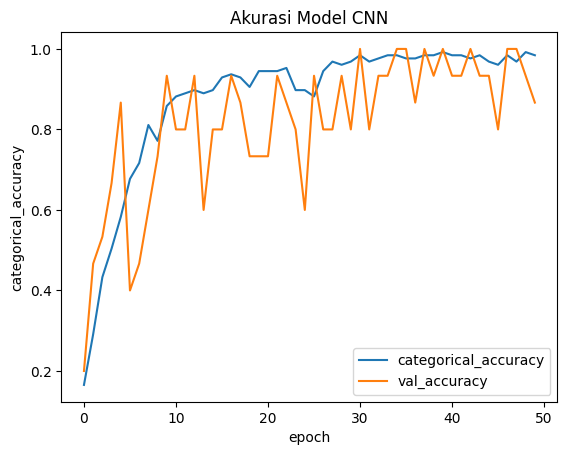

In [61]:
#accuracy chart
plt.plot(hist2.history['categorical_accuracy'])
plt.plot(hist2.history['val_categorical_accuracy'])
plt.title('Akurasi Model CNN')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['categorical_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

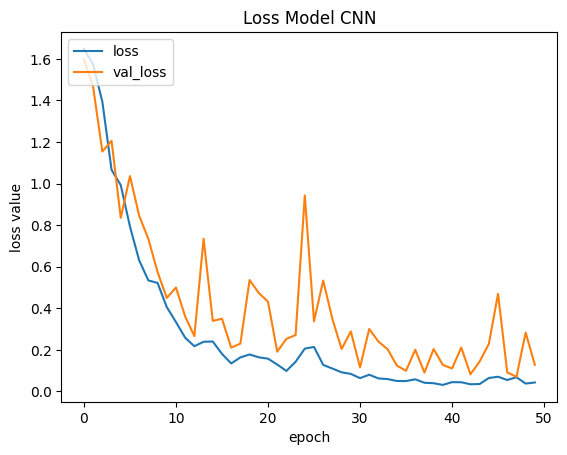

In [62]:
#loss chart
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Loss Model CNN')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

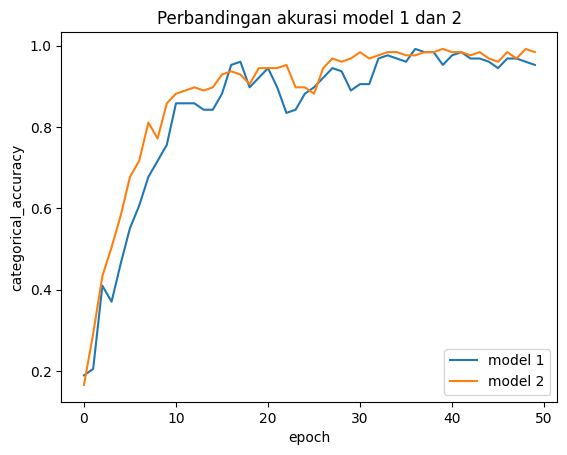

In [57]:
#accuracy chart
plt.plot(history.history['categorical_accuracy'])
plt.plot(hist2.history['categorical_accuracy'])
plt.title('Perbandingan akurasi model 1 dan 2')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['model 1', 'model 2'], loc='lower right')
plt.show()

In [64]:
model2.save('action_CNN2.h5')

In [ ]:
del model

In [26]:
model2.load_weights('action_CNN2.h5')

In [27]:
#menunjukan deskripsi tentang model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 1660, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 830, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 828, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 414, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 412, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 52736)             0

In [63]:
os.getcwd()

'D:\\Haady\\Kuliah\\Skripsi\\Model PI\\FinalModel'

# 8. Making Predictions from the data

In [70]:
res = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [71]:
actions[np.argmax(res[0])]

'Anda'

In [72]:
actions[np.argmax(y_test[1])]

'Maaf'

# 10. Evaluation with Confusion Matrix

In [73]:
#multilabel bakal ngasih confusion matrix buat setiap label
#accuracy score buat test akurasi
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [74]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [75]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [0, 1]],

       [[4, 1],
        [1, 2]],

       [[3, 1],
        [2, 2]],

       [[7, 1],
        [0, 0]]], dtype=int64)

In [77]:
accuracy_score(ytrue, yhat)

0.625

# 11. Realtime Testing

In [73]:
colors = [(245,117,16), (117,245,16), (16,117,245), (120,127,245), (130,125,145)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [79]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7 #the model will only recognize actions in a minimum value decided

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-20:]
        
        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]: #checking the current action not the same as last sentences
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:] #if the sentences has more than 5, we only take the last 5 value

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
        
        #position of sentences rectangle
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Maaf
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 22ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Maaf
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 20ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Maaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Maaf
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Anda
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 28ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Saya
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Saya
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Saya
<class 'mediapipe.python.soluti